# **Introduction to Machine Learning**

**Assignment 01**

Name: Vaishnav Nimmagadda

ID: 801327504

In this homework, we will use a dataset provided: D3.csv
Let the first three columns of the data set be separate explanatory variables X1, X2, X3. Let the fourth column be the dependent variable Y. (Note: You cannot use the built-in function from ML libraries for gradient descent, you have to implement it yourself.)

Problem 1 (50 points)

Develop a code that runs linear regression with a gradient decent algorithm for each explanatory variable in isolation. In this case, you assume that in each iteration, only one explanatory variable (either X1, X2, or X3) is explaining the output. You need to do three different training, one per each explanatory variable. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters to zero (theta to zero).

Report the linear model you found for each explanatory variable.
Plot the final regression model and loss over the iteration per each explanatory variable.
Which explanatory variable has the lower loss (cost) for explaining the output (Y)?
Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iterations.

Linear model for X1: Y = 5.8619 + -2.0126 * X1
Linear model for X2: Y = 0.7310 + 0.5596 * X2
Linear model for X3: Y = 2.8432 + -0.5093 * X3


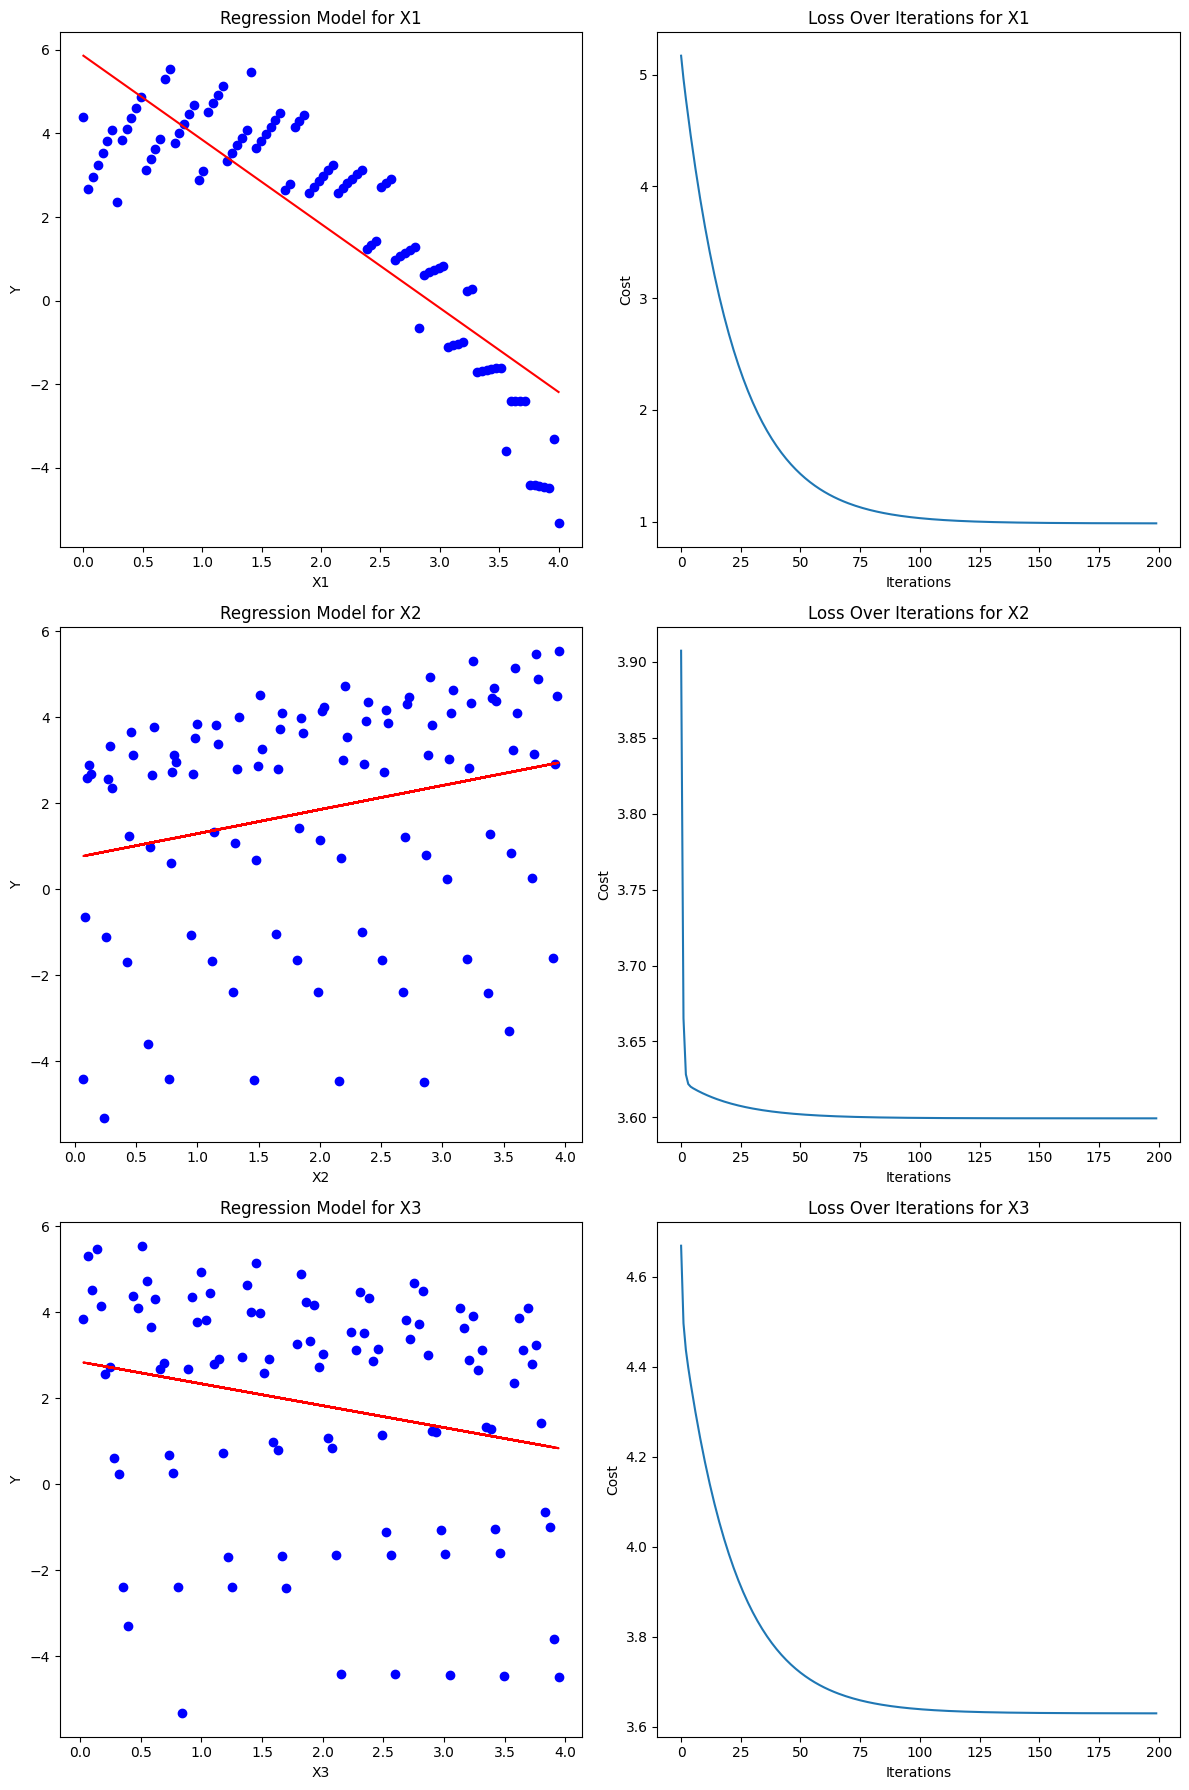

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to compute the cost (mean squared error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# Function for gradient descent algorithm
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        prediction = np.dot(X, theta)
        theta = theta - (1/m) * learning_rate * (X.T.dot((prediction - y)))
        cost_history[it] = compute_cost(X, y, theta)
    return theta, cost_history

# Prepare data for linear regression with each variable
def prepare_data(data, variable):
    X = data[variable].values.reshape(-1,1)
    y = data['Y'].values
    ones = np.ones((len(X), 1))
    X_b = np.concatenate([ones, X], axis=1)  # add bias term
    return X_b, y

# Load the dataset
file_path = '/D3.csv'
data = pd.read_csv(file_path)

# Parameters for gradient descent
iterations = 200
learning_rate = 0.1  # You can vary this between 0.01 and 0.1

# Running gradient descent for each explanatory variable
theta_values = {}
cost_histories = {}
for variable in ['X1', 'X2', 'X3']:
    X_b, y = prepare_data(data, variable)
    theta = np.zeros(2)  # Initialize theta
    theta_values[variable], cost_histories[variable] = gradient_descent(X_b, y, theta, learning_rate, iterations)

    # Outputting the linear model for each variable
    print(f"Linear model for {variable}: Y = {theta_values[variable][0]:.4f} + {theta_values[variable][1]:.4f} * {variable}")

# Plotting the regression model and loss for each variable
fig, axs = plt.subplots(3, 2, figsize=(12, 18))
for i, variable in enumerate(['X1', 'X2', 'X3']):
    X_b, y = prepare_data(data, variable)
    axs[i, 0].scatter(data[variable], y, color='blue')
    axs[i, 0].plot(data[variable], X_b.dot(theta_values[variable]), color='red')
    axs[i, 0].set_title(f'Regression Model for {variable}')
    axs[i, 0].set_xlabel(variable)
    axs[i, 0].set_ylabel('Y')

    axs[i, 1].plot(range(iterations), cost_histories[variable])
    axs[i, 1].set_title(f'Loss Over Iterations for {variable}')
    axs[i, 1].set_xlabel('Iterations')
    axs[i, 1].set_ylabel('Cost')

plt.tight_layout()
plt.show()


Problem 2 (50 points)

This time, run linear regression with gradient descent algorithm using all three explanatory variables. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (theta to zero).

Report the final linear model you found the best.
Plot loss over the iteration.
Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iterations.
Predict the value of y for new (X1, X2, X3) values (1, 1, 1), for (2, 0, 4), and for (3, 2, 1)

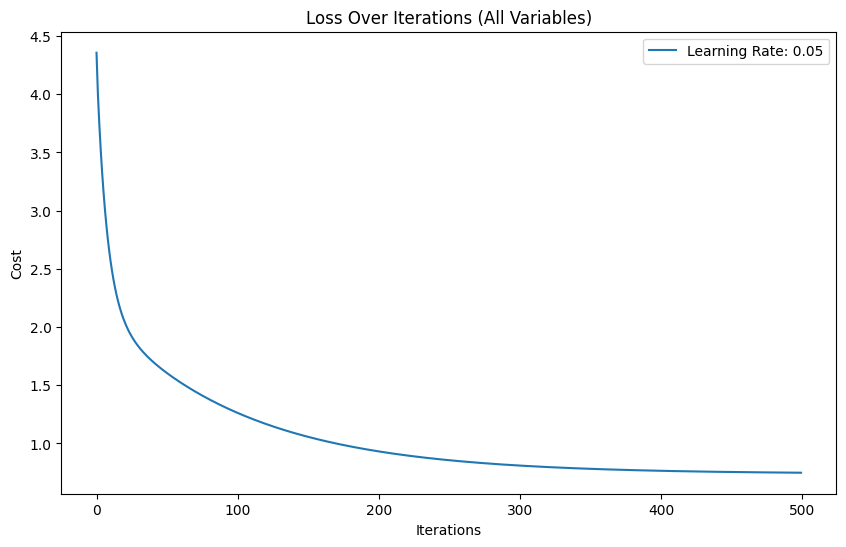

Final linear model: Y = 4.8873 + -1.9434*X1 + 0.6031*X2 + -0.2030*X3
Predictions:
  For (1, 1, 1), Y = 3.3440
  For (2, 0, 4), Y = 0.1883
  For (3, 2, 1), Y = 0.0602


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to compute the cost (mean squared error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# Function for gradient descent algorithm
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        prediction = np.dot(X, theta)
        theta = theta - (1/m) * learning_rate * (X.T.dot((prediction - y)))
        cost_history[it] = compute_cost(X, y, theta)
    return theta, cost_history

# Additional function to make predictions
def predict(theta, X_values):
    X_b = np.concatenate(([1], X_values))  # Adding the bias term
    return X_b.dot(theta)

# Prepare data for linear regression with all variables
def prepare_data_all(data):
    X_all = data[['X1', 'X2', 'X3']].values
    ones = np.ones((len(X_all), 1))
    X_b_all = np.concatenate([ones, X_all], axis=1)  # add bias term
    y_all = data['Y'].values
    return X_b_all, y_all

# Load the dataset
file_path = '/D3.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

X_b_all, y_all = prepare_data_all(data)

# Running gradient descent with all variables
learning_rate = 0.05  # Set to a specific value
iterations = 500      # Set to a specific number of iterations

# Initialize theta for 3 variables + bias
theta_all = np.zeros(4)

# Perform gradient descent
theta_all, cost_history_all = gradient_descent(X_b_all, y_all, theta_all, learning_rate, iterations)

# Plotting the loss over iterations
plt.figure(figsize=(10, 6))
plt.plot(cost_history_all, label=f'Learning Rate: {learning_rate}')
plt.title('Loss Over Iterations (All Variables)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

# Output the final linear model
print(f"Final linear model: Y = {theta_all[0]:.4f} + {theta_all[1]:.4f}*X1 + {theta_all[2]:.4f}*X2 + {theta_all[3]:.4f}*X3")

# Making predictions
predictions = {
    "(1, 1, 1)": predict(theta_all, [1, 1, 1]),
    "(2, 0, 4)": predict(theta_all, [2, 0, 4]),
    "(3, 2, 1)": predict(theta_all, [3, 2, 1])
}
print("Predictions:")
for point, value in predictions.items():
    print(f"  For {point}, Y = {value:.4f}")
